# **Fares Ahmed Moustafa**
## Apply K-means as a part of pre-processing for any old data then see the score after and before same for hierarchical

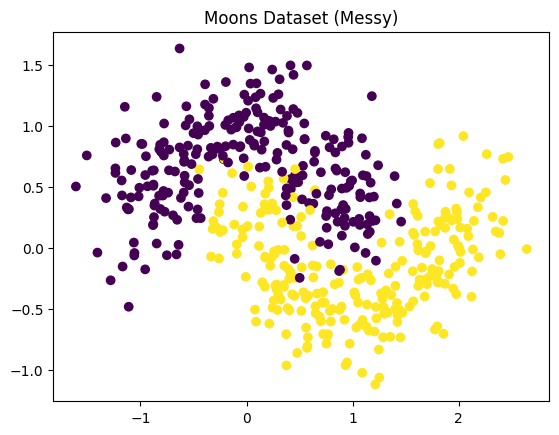

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# generate noisy moon-shaped data
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Moons Dataset (Messy)")
plt.show()

Baseline Logistic Regression Accuracy: 0.8533333333333334


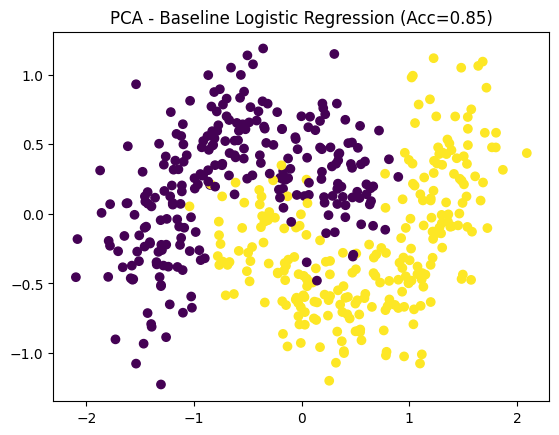

In [46]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_baseline = accuracy_score(y_test, y_pred)
print("Baseline Logistic Regression Accuracy:", acc_baseline)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title(f"PCA - Baseline Logistic Regression (Acc={acc_baseline:.2f})")
plt.show()

Logistic Regression + KMeans Accuracy: 0.8733333333333333


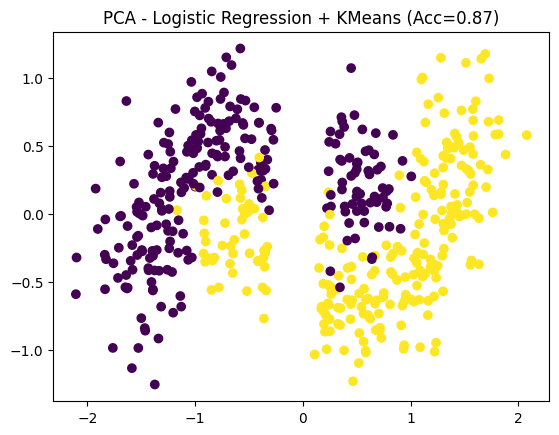

In [40]:
# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
train_clusters = kmeans.fit_predict(X_train)
test_clusters = kmeans.predict(X_test)

X_train_kmeans = np.hstack([X_train, train_clusters.reshape(-1, 1)])
X_test_kmeans = np.hstack([X_test, test_clusters.reshape(-1, 1)])

lr_kmeans = LogisticRegression()
lr_kmeans.fit(X_train_kmeans, y_train)
y_pred_kmeans = lr_kmeans.predict(X_test_kmeans)
acc_kmeans = accuracy_score(y_test, y_pred_kmeans)
print("Logistic Regression + KMeans Accuracy:", acc_kmeans)

X_kmeans = np.hstack([X, kmeans.fit_predict(X).reshape(-1, 1)])
X_pca_kmeans = PCA(n_components=2).fit_transform(X_kmeans)
plt.scatter(X_pca_kmeans[:, 0], X_pca_kmeans[:, 1], c=y, cmap='viridis')
plt.title(f"PCA - Logistic Regression + KMeans (Acc={acc_kmeans:.2f})")
plt.show()

Logistic Regression + Hierarchical Accuracy: 0.72


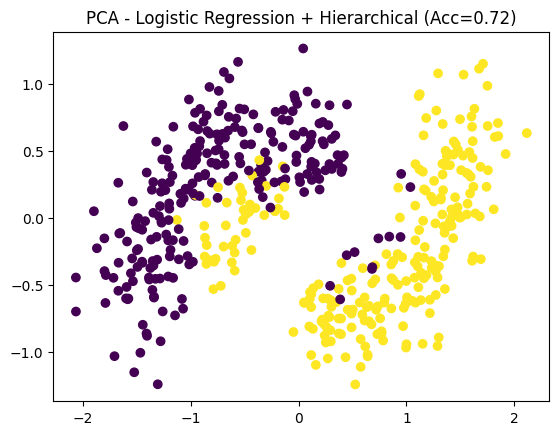

In [47]:
# Hierarchica Clustering
hier = AgglomerativeClustering(n_clusters=2)
train_clusters_h = hier.fit_predict(X_train)

hier_full = AgglomerativeClustering(n_clusters=2)
hier_full_clusters = hier_full.fit_predict(np.vstack([X_train, X_test]))
test_clusters_h = hier_full_clusters[len(X_train):]

X_train_hier = np.hstack([X_train, train_clusters_h.reshape(-1, 1)])
X_test_hier = np.hstack([X_test, test_clusters_h.reshape(-1, 1)])

lr_hier = LogisticRegression()
lr_hier.fit(X_train_hier, y_train)
y_pred_hier = lr_hier.predict(X_test_hier)
acc_hier = accuracy_score(y_test, y_pred_hier)
print("Logistic Regression + Hierarchical Accuracy:", acc_hier)

X_hier = np.hstack([X, hier.fit_predict(X).reshape(-1, 1)])
X_pca_hier = PCA(n_components=2).fit_transform(X_hier)
plt.scatter(X_pca_hier[:, 0], X_pca_hier[:, 1], c=y, cmap='viridis')
plt.title(f"PCA - Logistic Regression + Hierarchical (Acc={acc_hier:.2f})")
plt.show()

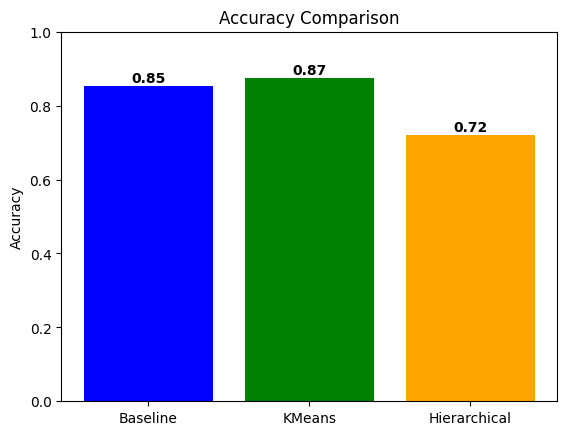

In [42]:
models = ["Baseline", "KMeans", "Hierarchical"]
accuracies = [acc_baseline, acc_kmeans, acc_hier]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.ylim(0, 1)
plt.show()